# Finance Exercises: Factor Models

Given a stock, the daily return of a stock today is today's closing price divided by yesterday's closing price; we then subtract 1 and multiply by 100 to get a percentage.

One of the most well-known factor models is the Capital Asset Pricing Model (CAPM), which takes the form: $E[R_s]=R_f +\beta(E[R_m]−R_f)$. Here, $R_s$ is the return for some security of interest, $R_m$ is the return for some market index such as the S&P500. $R_f$ is the risk-free return, typically the interest rate on US treasuries or assumed to be zero for simplicity.

This is really just a simple linear regression and $\beta$ is the slope for the "line of best fit." With simple linear regression, $\beta$ is just $\text{Cov}(E[R_s],E[R_m])/\text{Var}(E[R_m])$ where I'm thinking of these as arrays containing finitely many points of historic data telling us about the returns.

In [364]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [365]:
# Define the ticker symbol
ticker_symbol = "AAPL" # Apple

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-12-04 00:00:00-05:00  189.053807  189.123473  186.536142  188.506485   
2023-12-05 00:00:00-05:00  189.282708  193.452269  189.252841  192.477051   
2023-12-06 00:00:00-05:00  193.502037  193.810523  191.173448  191.382431   
2023-12-07 00:00:00-05:00  192.686042  194.049359  192.646229  193.322922   
2023-12-08 00:00:00-05:00  193.253242  195.034524  192.725827  194.755890   
...                               ...         ...         ...         ...   
2024-11-26 00:00:00-05:00  233.330002  235.570007  233.330002  235.059998   
2024-11-27 00:00:00-05:00  234.470001  235.690002  233.809998  234.929993   
2024-11-29 00:00:00-05:00  234.809998  237.809998  233.970001  237.330002   
2024-12-02 00:00:00-05:00  237.270004  240.789993  237.160004  239.589996   
2024-12-03 00:00:00-05:00  239.919998  241.634995  238.9002

In [366]:
apple=pd.DataFrame(historical_data)

In [367]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-04 00:00:00-05:00,189.053807,189.123473,186.536142,188.506485,43389500,0.0,0.0
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,193.502037,193.810523,191.173448,191.382431,41089700,0.0,0.0
2023-12-07 00:00:00-05:00,192.686042,194.049359,192.646229,193.322922,47477700,0.0,0.0
2023-12-08 00:00:00-05:00,193.253242,195.034524,192.725827,194.755890,53377300,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,0.0,0.0
2024-11-29 00:00:00-05:00,234.809998,237.809998,233.970001,237.330002,28481400,0.0,0.0


In [368]:
apple['Daily Returns %'] = ((apple['Close']/apple['Close'].shift(1))-1)*100

In [369]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-12-04 00:00:00-05:00,189.053807,189.123473,186.536142,188.506485,43389500,0.0,0.0,NaN
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0,2.106328
2023-12-06 00:00:00-05:00,193.502037,193.810523,191.173448,191.382431,41089700,0.0,0.0,-0.568701
2023-12-07 00:00:00-05:00,192.686042,194.049359,192.646229,193.322922,47477700,0.0,0.0,1.013934
2023-12-08 00:00:00-05:00,193.253242,195.034524,192.725827,194.755890,53377300,0.0,0.0,0.741230
...,...,...,...,...,...,...,...,...
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0,0.940440
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,0.0,0.0,-0.055307
2024-11-29 00:00:00-05:00,234.809998,237.809998,233.970001,237.330002,28481400,0.0,0.0,1.021585


In [370]:
# market index
SP500 = yf.Ticker('^GSPC')

# Fetch historical market data
historical_data2 = SP500.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data2)

Historical Data:
                                  Open         High          Low        Close  \
Date                                                                            
2023-12-04 00:00:00-05:00  4564.370117  4572.370117  4546.720215  4569.779785   
2023-12-05 00:00:00-05:00  4557.250000  4578.560059  4551.680176  4567.180176   
2023-12-06 00:00:00-05:00  4586.229980  4590.740234  4546.500000  4549.339844   
2023-12-07 00:00:00-05:00  4568.839844  4590.919922  4565.220215  4585.589844   
2023-12-08 00:00:00-05:00  4576.200195  4609.229980  4574.060059  4604.370117   
...                                ...          ...          ...          ...   
2024-11-26 00:00:00-05:00  6000.029785  6025.419922  5992.270020  6021.629883   
2024-11-27 00:00:00-05:00  6014.109863  6020.160156  5984.870117  5998.740234   
2024-11-29 00:00:00-05:00  6003.979980  6044.169922  6003.979980  6032.379883   
2024-12-02 00:00:00-05:00  6040.109863  6053.580078  6035.330078  6047.149902   
2024-12-03 

In [371]:
sp500 = pd.DataFrame(historical_data2)

In [372]:
sp500['Daily Returns %'] = ((sp500['Close']/sp500['Close'].shift(1))-1)*100

In [373]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0,NaN
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0,-0.056887
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,0.0,0.0,-0.390620
2023-12-07 00:00:00-05:00,4568.839844,4590.919922,4565.220215,4585.589844,3818880000,0.0,0.0,0.796819
2023-12-08 00:00:00-05:00,4576.200195,4609.229980,4574.060059,4604.370117,3707010000,0.0,0.0,0.409550
...,...,...,...,...,...,...,...,...
2024-11-26 00:00:00-05:00,6000.029785,6025.419922,5992.270020,6021.629883,3835170000,0.0,0.0,0.572201
2024-11-27 00:00:00-05:00,6014.109863,6020.160156,5984.870117,5998.740234,3363340000,0.0,0.0,-0.380124
2024-11-29 00:00:00-05:00,6003.979980,6044.169922,6003.979980,6032.379883,2444420000,0.0,0.0,0.560779


In [374]:
# getting just the daily returns (and dropping the 'NaN' values)

sp500_daily_returns = sp500['Daily Returns %'].values
sp500_daily_returns=sp500_daily_returns[1:]

In [375]:
apple_daily_returns = apple['Daily Returns %'].values
apple_daily_returns=apple_daily_returns[1:]


In [376]:
matrix = np.cov(apple_daily_returns,sp500_daily_returns)

In [377]:
# covariance divided by variance of market return
matrix[0][1]/matrix[1][1]

np.float64(0.9776052612642016)

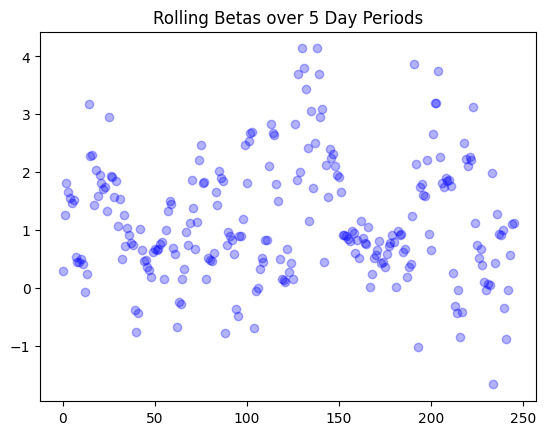

In [378]:
# Let's compute a "rolling" beta where we compute beta for a course of 5 days
N=5
betas = []
for i in range(len(sp500_daily_returns)-N):
    matrix = np.cov(apple_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {N} Day Periods')
plt.show()

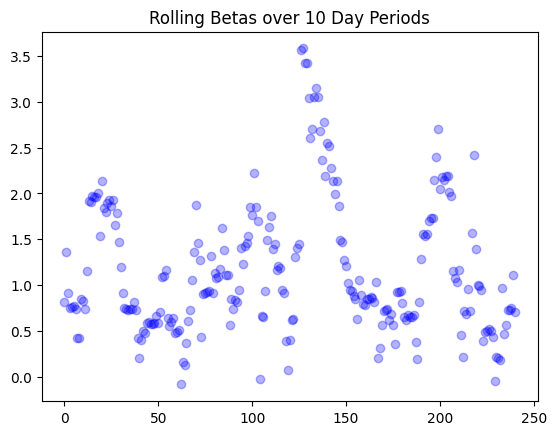

In [379]:
# Let's compute a "rolling" beta where we compute beta for a course of 10 days
N=10
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {N} Day Periods')
plt.show()

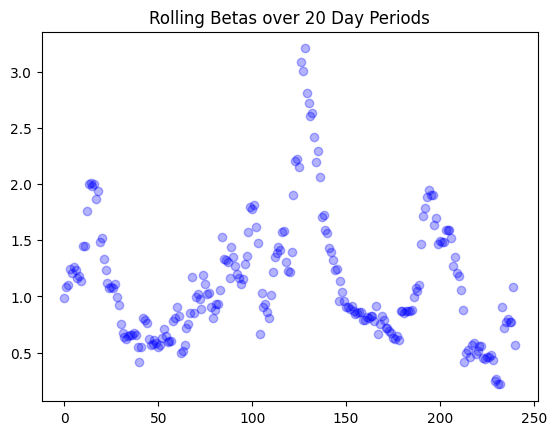

In [380]:
# Let's compute a "rolling" beta where we compute beta for a course of 10 days
N=20
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {N} Day Periods')
plt.show()

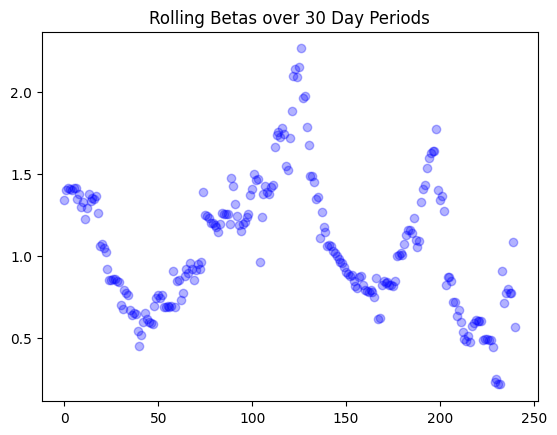

In [381]:
# Let's compute a "rolling" beta where we compute beta for a course of 10 days
N=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {N} Day Periods')
plt.show()

It definitely seems there is some kind of periodic behavior or trend

Trying Prophet for forecasting

In [382]:
from prophet import Prophet

In [383]:
n=5
betas = []

for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])

In [384]:
# the date was the index, now it becomes a column
sp500.reset_index(inplace=True)

In [385]:
dates=sp500['Date'].values

In [386]:
len(dates)

252

In [387]:
len(betas)

246

In [388]:
dates = dates[:-6]

In [389]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [390]:
X

,ds,y
0,2023-12-04 05:00:00,0.290240
1,2023-12-05 05:00:00,1.258474
2,2023-12-06 05:00:00,1.811885
3,2023-12-07 05:00:00,1.650124
4,2023-12-08 05:00:00,1.560559
...,...,...
241,2024-11-18 05:00:00,-0.886241
242,2024-11-19 05:00:00,-0.039080
243,2024-11-20 05:00:00,0.574364
244,2024-11-21 05:00:00,1.099449


In [391]:
m=Prophet()

In [392]:
m.fit(X)

12:30:54 - cmdstanpy - INFO - Chain [1] start processing
12:30:54 - cmdstanpy - INFO - Chain [1] done processing


In [393]:
future=m.make_future_dataframe(periods=5)

In [394]:
forecast=m.predict(future)

In [395]:
X[-10:]

,ds,y
236,2024-11-11 05:00:00,1.282077
237,2024-11-12 05:00:00,0.927798
238,2024-11-13 05:00:00,0.923124
239,2024-11-14 05:00:00,0.992933
240,2024-11-15 05:00:00,-0.348338
241,2024-11-18 05:00:00,-0.886241
242,2024-11-19 05:00:00,-0.039080
243,2024-11-20 05:00:00,0.574364
244,2024-11-21 05:00:00,1.099449
245,2024-11-22 05:00:00,1.128802


In [396]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
236,2024-11-11 05:00:00,1.163826,-0.192343,2.416444
237,2024-11-12 05:00:00,1.166999,-0.223026,2.471968
238,2024-11-13 05:00:00,1.254583,0.012575,2.585558
239,2024-11-14 05:00:00,1.097362,-0.257639,2.369005
240,2024-11-15 05:00:00,1.104935,-0.278229,2.352502
241,2024-11-18 05:00:00,1.163535,-0.102386,2.595468
242,2024-11-19 05:00:00,1.166708,-0.293536,2.495052
243,2024-11-20 05:00:00,1.254292,0.033347,2.596934
244,2024-11-21 05:00:00,1.097071,-0.186700,2.460194
245,2024-11-22 05:00:00,1.104644,-0.279637,2.451314


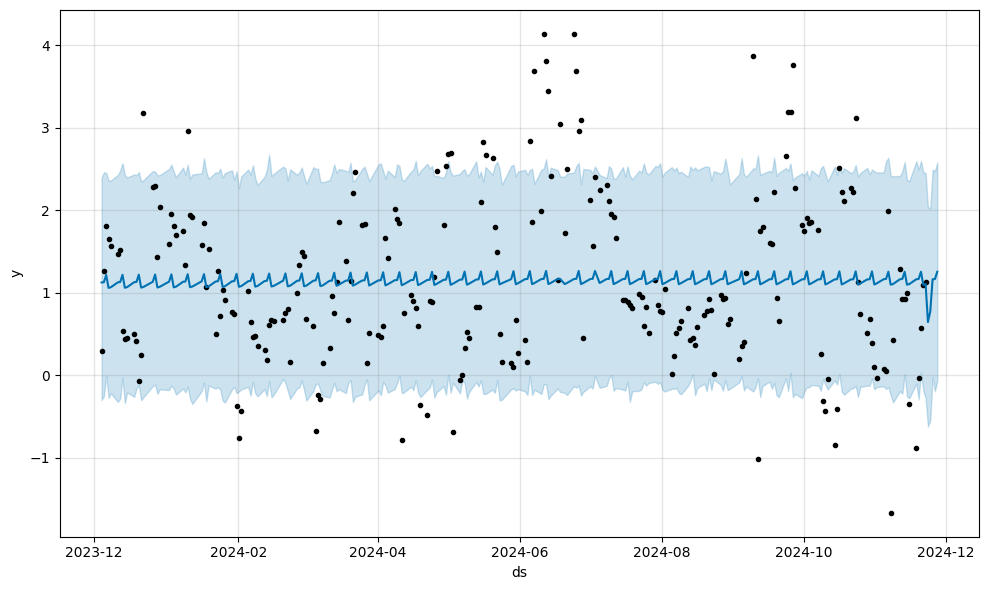

In [397]:
fig=m.plot(forecast)

I'm not sure why the prediction has such small and consistent oscillations...I am just using the Prophet "out of the box" without tuning hyperparameters.

In [398]:
# Let's compute a "rolling" beta where we compute beta for a course of 30 days
n=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])


In [399]:
dates=sp500['Date'].values

In [400]:
dates = dates[:-31]

In [401]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [402]:
m=Prophet()

In [403]:
m.fit(X)

12:30:55 - cmdstanpy - INFO - Chain [1] start processing


12:30:55 - cmdstanpy - INFO - Chain [1] done processing


In [404]:
future=m.make_future_dataframe(periods=5)

In [405]:
forecast=m.predict(future)

In [406]:
X[-10:]

,ds,y
211,2024-10-07 04:00:00,0.600701
212,2024-10-08 04:00:00,0.539270
213,2024-10-09 04:00:00,0.491569
214,2024-10-10 04:00:00,0.479539
215,2024-10-11 04:00:00,0.512452
216,2024-10-14 04:00:00,0.476940
217,2024-10-15 04:00:00,0.572429
218,2024-10-16 04:00:00,0.591600
219,2024-10-17 04:00:00,0.611120
220,2024-10-18 04:00:00,0.600913


In [407]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
211,2024-10-07 04:00:00,0.925968,0.504447,1.351996
212,2024-10-08 04:00:00,0.923204,0.492832,1.350582
213,2024-10-09 04:00:00,0.924473,0.507596,1.357986
214,2024-10-10 04:00:00,0.903460,0.526332,1.337546
215,2024-10-11 04:00:00,0.911796,0.504825,1.333097
216,2024-10-14 04:00:00,0.907526,0.475509,1.320300
217,2024-10-15 04:00:00,0.904762,0.457000,1.323603
218,2024-10-16 04:00:00,0.906031,0.493447,1.347312
219,2024-10-17 04:00:00,0.885019,0.456865,1.278729
220,2024-10-18 04:00:00,0.893355,0.482097,1.313405


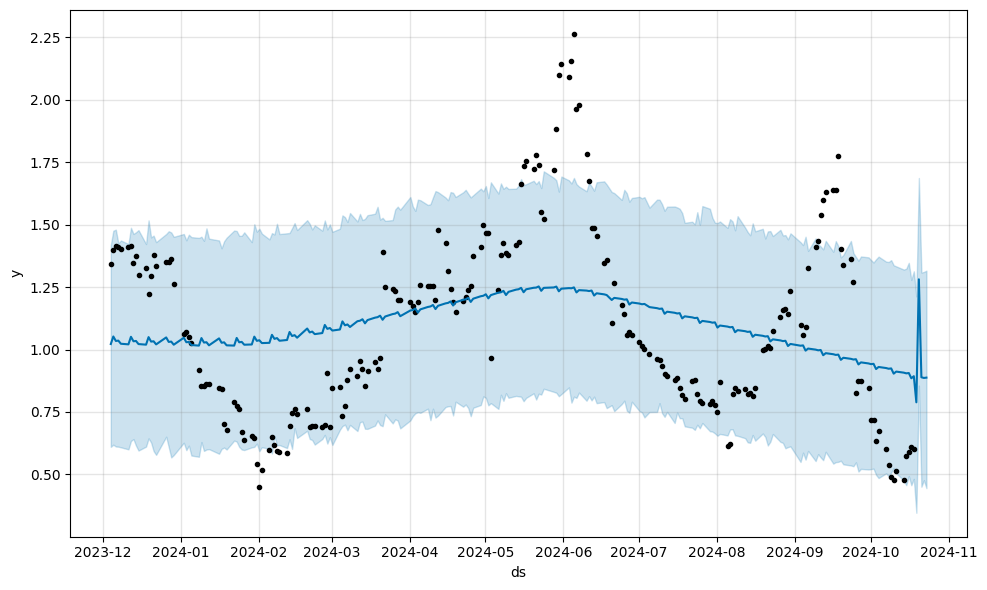

In [408]:
fig=m.plot(forecast)

Seems really off; there is some seeming seasonality but Prophet doesn't seem to detect it. Weird jump at the end

## Doing the same thing but with a random collection of tickers

In [409]:
import bs4 as bs
import requests
from random import randrange
import yfinance as yf # not sure why but it seems VSCode needs yfinance to be imported again

In [410]:
def get_tickers():
    
    # Scrape the Wikipedia page related to the S&P500 
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable sticky-header'})
    tickers = []

    # Import stock tickers
    for row in table.findAll('tr')[2:]: 
        ticker_info = (row.findAll('td')[0].text.replace('\n', ''), row.findAll('td')[1].text, row.findAll('td')[2].text)
        tickers.append(ticker_info)
    
    return tickers

In [411]:
list=get_tickers()

In [412]:
list

[('AOS', 'A. O. Smith', 'Industrials'),
 ('ABT', 'Abbott Laboratories', 'Health Care'),
 ('ABBV', 'AbbVie', 'Health Care'),
 ('ACN', 'Accenture', 'Information Technology'),
 ('ADBE', 'Adobe Inc.', 'Information Technology'),
 ('AMD', 'Advanced Micro Devices', 'Information Technology'),
 ('AES', 'AES Corporation', 'Utilities'),
 ('AFL', 'Aflac', 'Financials'),
 ('A', 'Agilent Technologies', 'Health Care'),
 ('APD', 'Air Products', 'Materials'),
 ('ABNB', 'Airbnb', 'Consumer Discretionary'),
 ('AKAM', 'Akamai Technologies', 'Information Technology'),
 ('ALB', 'Albemarle Corporation', 'Materials'),
 ('ARE', 'Alexandria Real Estate Equities', 'Real Estate'),
 ('ALGN', 'Align Technology', 'Health Care'),
 ('ALLE', 'Allegion', 'Industrials'),
 ('LNT', 'Alliant Energy', 'Utilities'),
 ('ALL', 'Allstate', 'Financials'),
 ('GOOGL', 'Alphabet Inc. (Class A)', 'Communication Services'),
 ('GOOG', 'Alphabet Inc. (Class C)', 'Communication Services'),
 ('MO', 'Altria', 'Consumer Staples'),
 ('AMZN',

In [413]:
# Pick a random stock (without repetition) from a list
def random_picker(list):   
    i = randrange(len(list))
    random_stock = list[i]
    
    return random_stock

In [494]:
# Get n stocks from S&P500, some dataframes are empty
n=10
k=0
period = '1y'
prices = []
stock_names=[]
stock_symbols=[]
while k<n:
    name = random_picker(list)
    ticker = yf.Ticker(name[0])
    stock_prices = ticker.history(period=period)
    if not stock_prices.empty:
        stock_names.append(name)
        stock_symbols.append(name[0])
        prices.append(stock_prices)
        k+=1

In [495]:
stock_names # seems there is random selection with replacement

[('IRM', 'Iron Mountain', 'Real Estate'),
 ('ALB', 'Albemarle Corporation', 'Materials'),
 ('COST', 'Costco', 'Consumer Staples'),
 ('COO', 'Cooper Companies (The)', 'Health Care'),
 ('PTC', 'PTC Inc.', 'Information Technology'),
 ('GL', 'Globe Life', 'Financials'),
 ('STT', 'State Street Corporation', 'Financials'),
 ('BDX', 'Becton Dickinson', 'Health Care'),
 ('AXP', 'American Express', 'Financials'),
 ('NKE', 'Nike, Inc.', 'Consumer Discretionary')]

In [496]:
# combines columns labeled 'Value' from dataframes that are placed in a list (so each dataframe needs 'Value' as a column)
# adds an average value column and also daily return % column

def combine(prices,value):
    # Concatenate the value columns
    combined = pd.concat([df[value] for df in prices], axis=1)

    combined.columns = stock_symbols

    combined = combined.dropna(axis=1)

    # Calculate the average value price for each day
    combined['Average_' + value] = combined.mean(axis=1)
    combined['Daily Returns %'] = ((combined['Average_'+value]/combined['Average_'+value].shift(1))-1)*100
    return combined

In [497]:
combined = combine(prices,'Close')

In [498]:
combined.head()

,IRM,ALB,COST,COO,PTC,GL,STT,BDX,AXP,NKE,Average_Close,Daily Returns %
Date,,,,,,,,,,,,
2023-12-04 00:00:00-05:00,64.159111,118.272430,582.358582,84.580002,159.899994,123.426201,71.490646,233.760498,171.200073,113.208054,172.235559,NaN
2023-12-05 00:00:00-05:00,63.955585,111.648064,588.453430,83.822502,160.740005,122.792076,70.641640,229.854156,168.660477,113.463669,171.403160,-0.483291
2023-12-06 00:00:00-05:00,63.945892,116.616348,590.475464,85.642502,159.850006,121.989525,68.924316,229.706558,165.527985,114.151871,171.683047,0.163291
2023-12-07 00:00:00-05:00,63.567921,123.565994,593.897217,86.237503,163.240005,121.127502,70.603043,230.734055,166.624863,112.873795,173.247190,0.911064
2023-12-08 00:00:00-05:00,63.432240,126.168427,593.732056,83.750000,166.610001,121.236496,71.365227,229.508957,166.437103,113.955246,173.619575,0.214945


In [499]:
combined_daily_returns = combined['Daily Returns %'].values

In [500]:
combined_daily_returns=combined_daily_returns[1:]

In [511]:
# Rolling betas
N=5 # over a period of N days
roll_betas = []

for i in range(len(sp500_daily_returns)-N):
    matrix = np.cov(combined_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    roll_betas.append(matrix[0][1]/matrix[1][1])

dates = sp500['Date'].values[1:]
dates=dates[:-N]
len(dates)==len(roll_betas)
X = pd.DataFrame({'ds': dates, 'y': roll_betas})

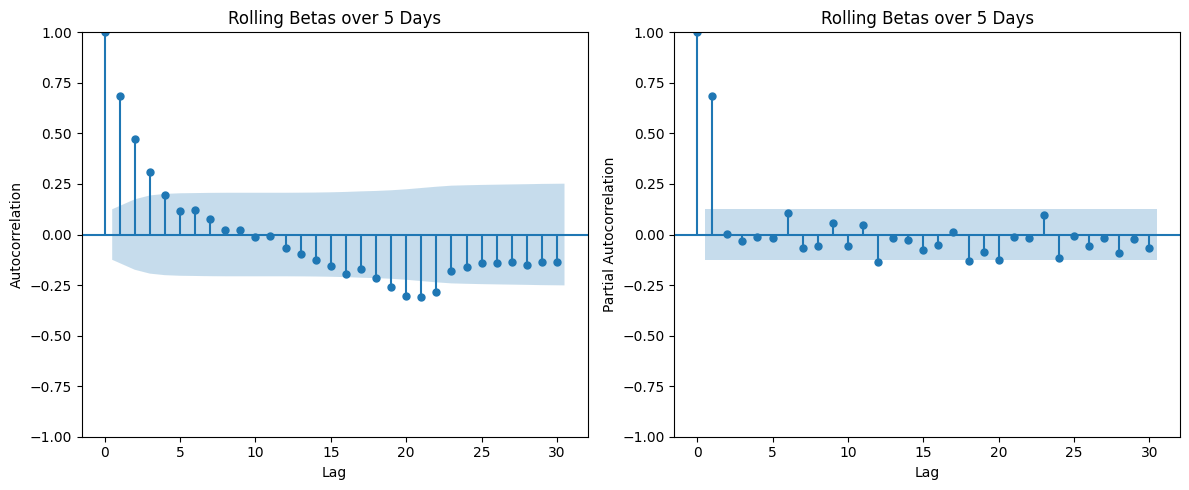

In [512]:

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sm.graphics.tsa.plot_acf(roll_betas,
                            lags = 30, ax=axes[0])

axes[0].set_title(f'Rolling Betas over {N} Days')
axes[0].set_ylabel("Autocorrelation")
axes[0].set_xlabel("Lag")

sm.graphics.tsa.plot_pacf(roll_betas,
                            lags = 30, ax=axes[1])

axes[1].set_title(f'Rolling Betas over {N} Days')
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_xlabel("Lag")


plt.tight_layout()
plt.show()

## Important Note:

The way we defined the rolling betas is that we have a "sliding window" of size $N$ and take the covariances and variances of data points in that window. Then we increment up by 1 and do this again. So between one window and the next, they share $N-2$ of the exact same data points and thus, the autocorrelation will certainly have a nice pattern to it.

In fact, there's probably not much of a reason to even plot these. Though, in the above plot where $N=5$, we see some strong correlation up until the lag equals $5$. But I'm not sure why there is a signal showing up again around $18$ to $22$ lags.

On the other hand, the **partial** autocorrelation function is the autocorrelation between $z_t$ and $z_{t+k}$ that is **not accounted for by lags $1$ through $k-1$, inclusive.** So maybe there is something interesting about the partial autocorrelation, I'm not sure...

13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:10 - cmdstanpy - INFO - Chain [1] done processing


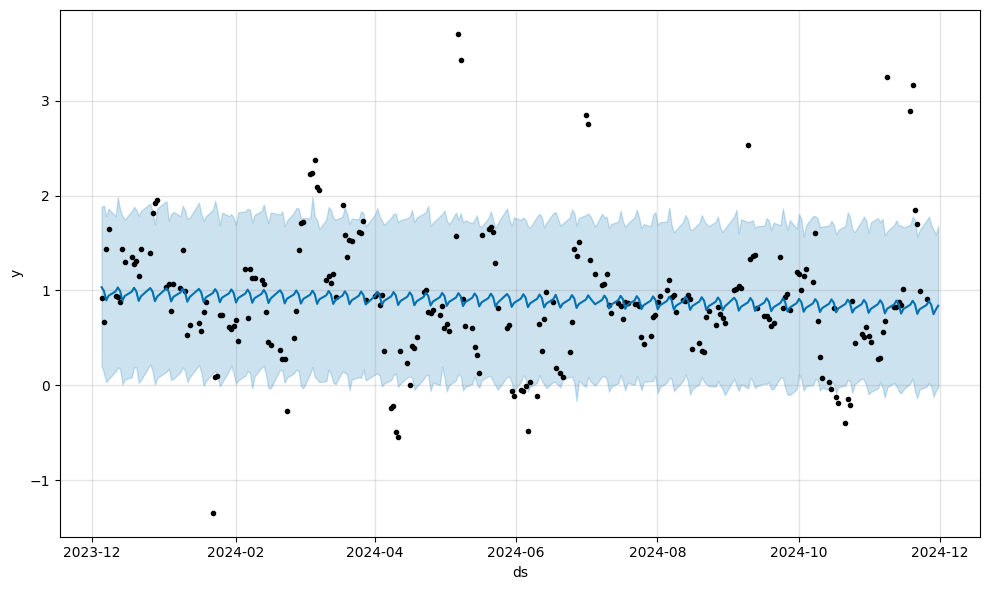

In [513]:
days = 5 # predict 5 days into future
m=Prophet()
m.fit(X)
future=m.make_future_dataframe(periods=days) 
forecast=m.predict(future)
fig=m.plot(forecast)

Try for other values of $N$

In [514]:
# Rolling betas
N=10 # over a period of N days
roll_betas = []

for i in range(len(sp500_daily_returns)-N):
    matrix = np.cov(combined_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    roll_betas.append(matrix[0][1]/matrix[1][1])

dates = sp500['Date'].values[1:]
dates=dates[:-N]
len(dates)==len(roll_betas)
X = pd.DataFrame({'ds': dates, 'y': roll_betas})


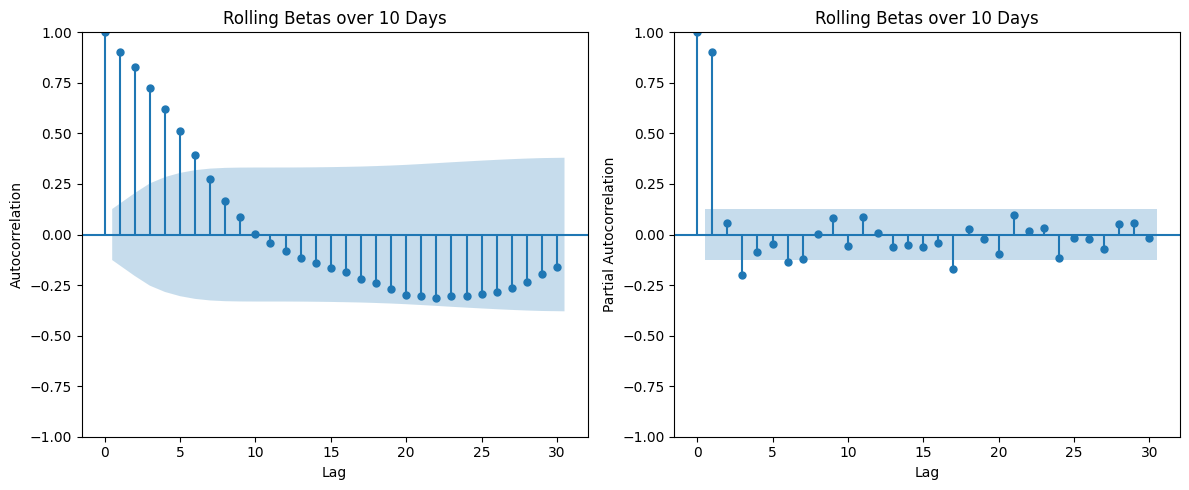

In [515]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sm.graphics.tsa.plot_acf(roll_betas,
                            lags = 30, ax=axes[0])

axes[0].set_title(f'Rolling Betas over {N} Days')
axes[0].set_ylabel("Autocorrelation")
axes[0].set_xlabel("Lag")

sm.graphics.tsa.plot_pacf(roll_betas,
                            lags = 30, ax=axes[1])

axes[1].set_title(f'Rolling Betas over {N} Days')
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_xlabel("Lag")


plt.tight_layout()
plt.show()

13:00:11 - cmdstanpy - INFO - Chain [1] start processing
13:00:11 - cmdstanpy - INFO - Chain [1] done processing


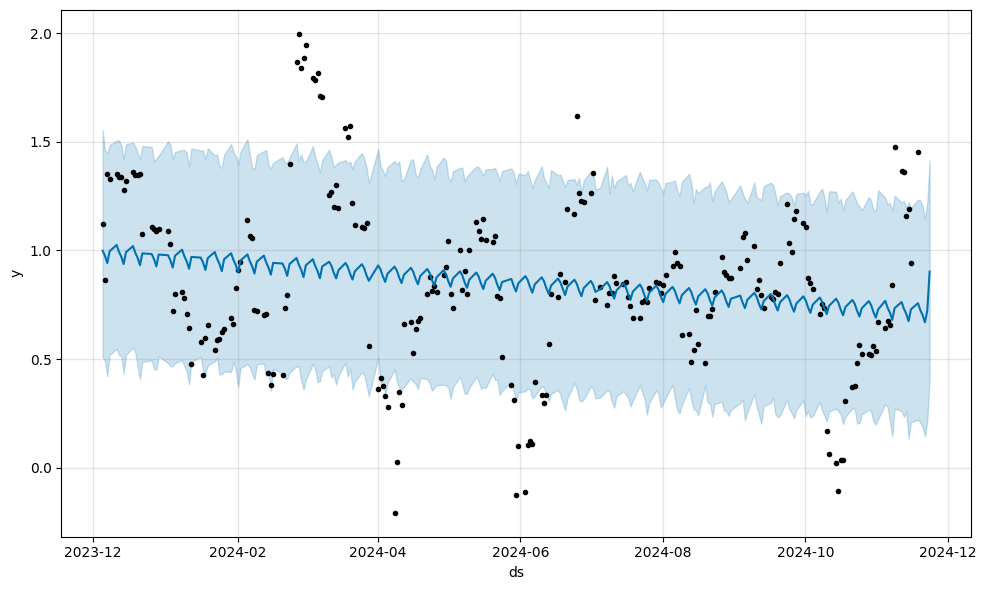

In [516]:
days = 5 # predict 5 days into future
m=Prophet()
m.fit(X)
future=m.make_future_dataframe(periods=days) 
forecast=m.predict(future)
fig=m.plot(forecast)

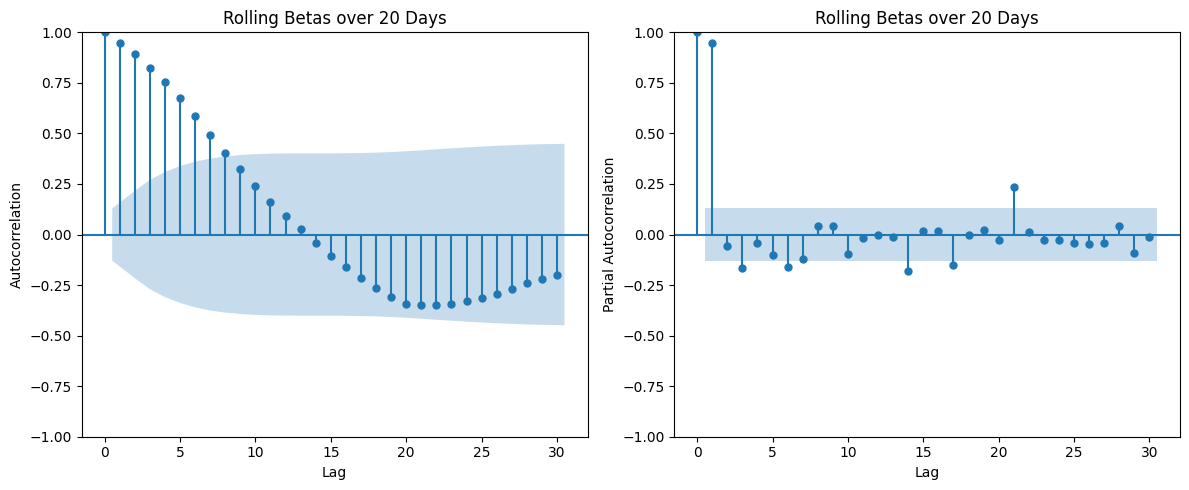

13:00:12 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing


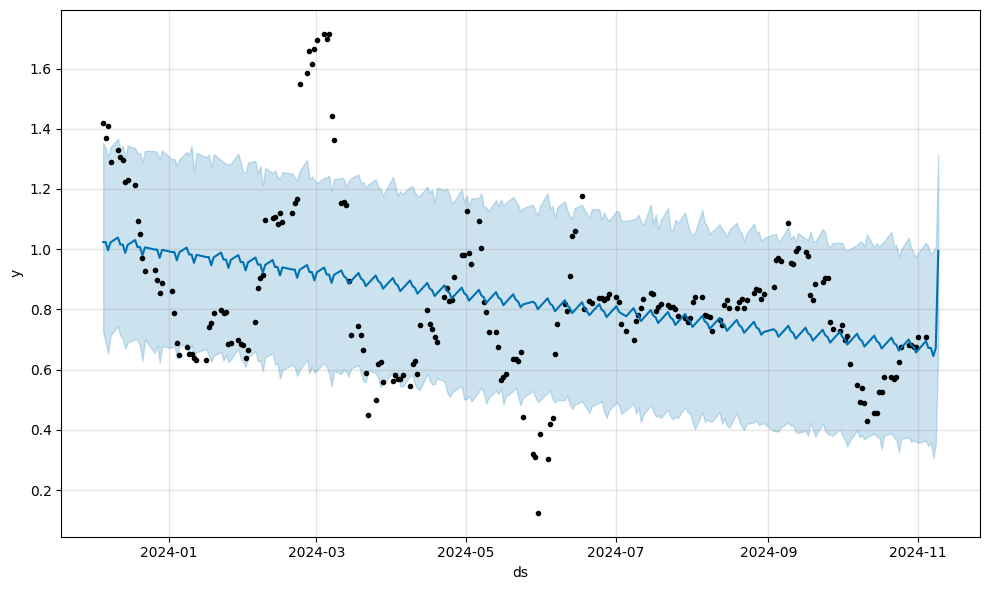

In [517]:
# Rolling betas
N=20 # over a period of N days
roll_betas = []

for i in range(len(sp500_daily_returns)-N):
    matrix = np.cov(combined_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    roll_betas.append(matrix[0][1]/matrix[1][1])

dates = sp500['Date'].values[1:]
dates=dates[:-N]
len(dates)==len(roll_betas)
X = pd.DataFrame({'ds': dates, 'y': roll_betas})

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sm.graphics.tsa.plot_acf(roll_betas,
                            lags = 30, ax=axes[0])

axes[0].set_title(f'Rolling Betas over {N} Days')
axes[0].set_ylabel("Autocorrelation")
axes[0].set_xlabel("Lag")

sm.graphics.tsa.plot_pacf(roll_betas,
                            lags = 30, ax=axes[1])

axes[1].set_title(f'Rolling Betas over {N} Days')
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_xlabel("Lag")


plt.tight_layout()
plt.show()

days = 5 # predict 5 days into future
m=Prophet()
m.fit(X)
future=m.make_future_dataframe(periods=days) 
forecast=m.predict(future)
fig=m.plot(forecast)

The sliding window of size $N=20$ is really smoothing the autocorrelation function out. As I said above, it's probably not a very useful plot. The partial autocorrelation could be interesting, however.

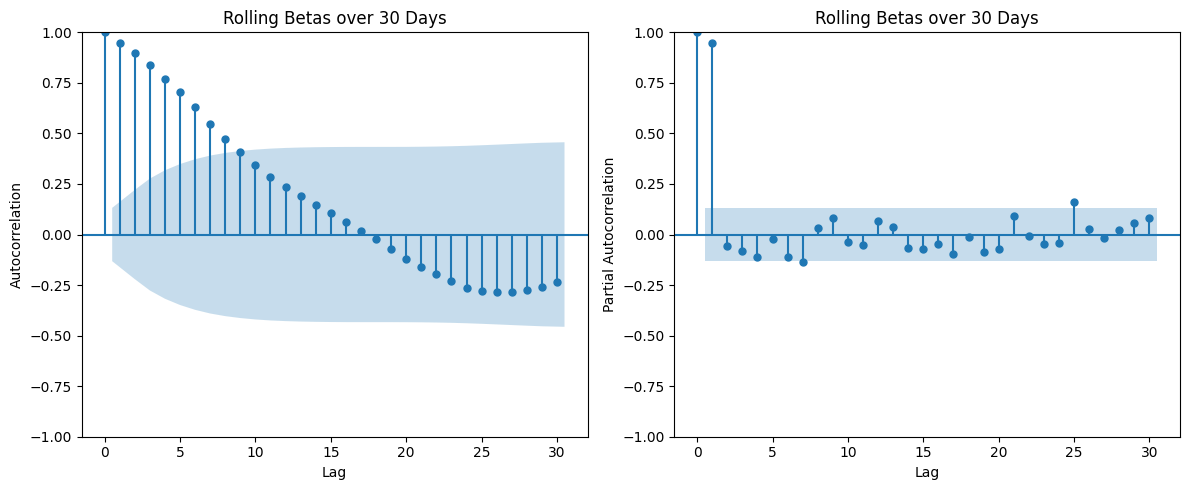

13:00:12 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing


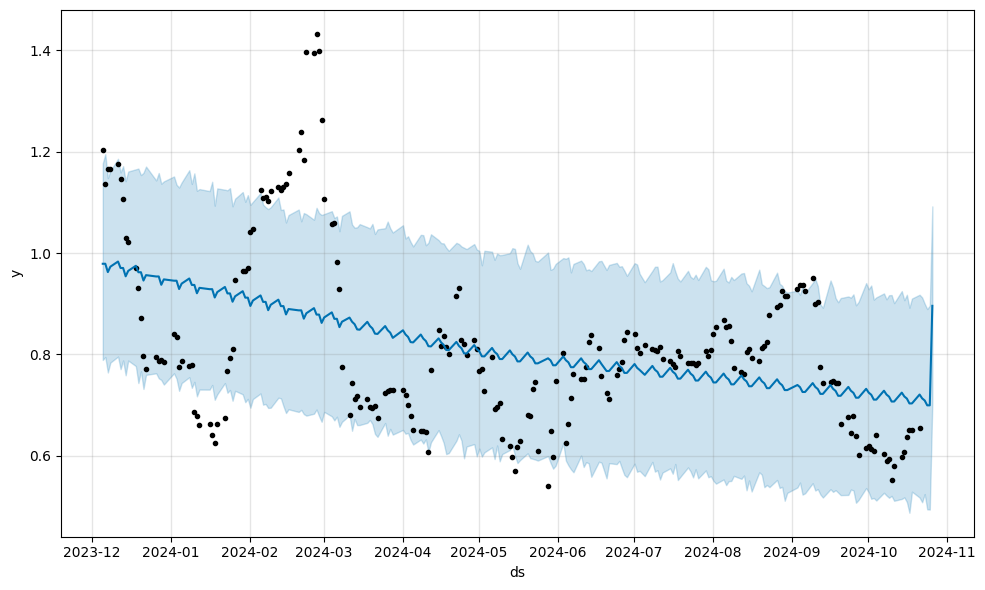

In [518]:
# Rolling betas
N=30 # over a period of N days
roll_betas = []

for i in range(len(sp500_daily_returns)-N):
    matrix = np.cov(combined_daily_returns[i:i+N],sp500_daily_returns[i:i+N])
    roll_betas.append(matrix[0][1]/matrix[1][1])

dates = sp500['Date'].values[1:]
dates=dates[:-N]
len(dates)==len(roll_betas)
X = pd.DataFrame({'ds': dates, 'y': roll_betas})

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sm.graphics.tsa.plot_acf(roll_betas,
                            lags = 30, ax=axes[0])

axes[0].set_title(f'Rolling Betas over {N} Days')
axes[0].set_ylabel("Autocorrelation")
axes[0].set_xlabel("Lag")

sm.graphics.tsa.plot_pacf(roll_betas,
                            lags = 30, ax=axes[1])

axes[1].set_title(f'Rolling Betas over {N} Days')
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_xlabel("Lag")


plt.tight_layout()
plt.show()

days = 5 # predict 5 days into future
m=Prophet()
m.fit(X)
future=m.make_future_dataframe(periods=days) 
forecast=m.predict(future)
fig=m.plot(forecast)